<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Battle of the Cities: Small Town USA - LaJunta, CO</font></h1>

## Introduction

All across America’s Midwest there are hundreds of small and medium sized communities that are struggling to remain alive, vibrant, and relevant to the families who live there. Many of these cities were established during the frontier expansion of the United States during the 19th century. They served as the highways and supply lines carrying eastern goods across the country and for delivering farm produce to both coasts. They are the typification of the term “Small Town America”. However, as the wealth, resources, and opportunities of the mid-twentieth and early twenty-first century have greatly expanded in metropolitan areas, these small towns have remained stuck with low incomes and few opportunities for the next generation that is raised there. 
This report uses Four Square location data and machine learning techniques to explore and compare two of these towns in Southeastern Colorado. The objective is to identify the advantages and quality of living in both towns. The data and report will be useful to the cities’ leaders as they seek to develop a more robust economy for their community. 
This report is structured as a consulting product commissioned by the city leaders of Lamar, CO to assist them in competing for economic opportunities with their historical rival, La Junta, CO. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
1. <a href="#item1">Foursquare API Search Function</a>    
2. <a href="#item2">Explore a Given Venue</a>   
3. <a href="#item3">Explore a User</a>  
4. <a href="#item4">Foursquare API Explore Function</a>  
5. <a href="#item5">Get Trending Venues</a>  
</font>
</div>

### Import necessary Libraries

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          84 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0     conda-forge

The following packages will be UPDATED:

    geopy:         1.11.0-py36_0 conda-forge --> 1.18.1-py_0 conda-forge


geopy-1.18.1         | 51 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executi

### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ' # your Foursquare ID
CLIENT_SECRET = '1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V' # your Foursquare Secret
VERSION = '20180604'
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ
CLIENT_SECRET:1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V


#### So let's start by converting the city search center address to its latitude and longitude coordinates.

In [3]:
# Search Location
city = 'La Junta, CO'
SearchCenter = 'City Hall'
address = '601 Colorado Avenue, La Junta, CO 81050'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


37.982941 -103.542948


<a id="item1"></a>

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

#### Searching for all venues within 1600 meters (approx 1 mile) of the main intersection. 

In [4]:
search_query = ''
radius = 1600 #1600 meters is approx 1 mile
LIMIT = 115 # Total for '' is 115
print(search_query + ' .... OK!')

 .... OK!


#### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ&client_secret=1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V&ll=37.982941,-103.542948&v=20180604&query=&radius=1600&limit=115'

#### Send the GET Request and examine the results

In [6]:
results = requests.get(url).json()
#results

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [9]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe.head()

(115, 18)


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",False,4e1cc6e97d8b8fe8c30b4b15,5th & Colorado,US,La Junta,United States,NaN,49,"[5th & Colorado, La Junta, CO 81050, United St...","[{'label': 'display', 'lat': 37.98322498553249...",37.983225,-103.543377,81050,CO,Woodruff Memorial Library,v-1547764491,NaN
1,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",False,4e0e408122711665f6131b28,324 Colorado Ave,US,La Junta,United States,NaN,244,"[324 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98512136666667...",37.985121,-103.543265,81050,CO,LJ Post Office,v-1547764491,NaN
2,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",False,4e2afbdb45dd3272c80d7a16,NaN,US,NaN,United States,NaN,48,"[Colorado, United States]","[{'label': 'display', 'lat': 37.98277584, 'lng...",37.982776,-103.543455,NaN,Colorado,Take Thyme Away,v-1547764491,NaN
3,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4f433d55e4b09d14bc4c304e,NaN,US,La Junta,United States,NaN,43,"[La Junta, CO 81050, United States]","[{'label': 'display', 'lat': 37.982612, 'lng':...",37.982612,-103.543214,81050,CO,CenturyLink Office LaJunta,v-1547764491,NaN
4,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",False,4d59dd8f24466ea844107c9f,601 Colorado Ave,US,La Junta,United States,NaN,356,"[601 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98613892087466...",37.986139,-103.543095,81050,CO,City Of La Junta,v-1547764491,NaN


#### Define information of interest and filter dataframe

In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Woodruff Memorial Library,Library,5th & Colorado,US,La Junta,United States,NaN,49,"[5th & Colorado, La Junta, CO 81050, United St...","[{'label': 'display', 'lat': 37.98322498553249...",37.983225,-103.543377,81050,CO,4e1cc6e97d8b8fe8c30b4b15
1,LJ Post Office,Post Office,324 Colorado Ave,US,La Junta,United States,NaN,244,"[324 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98512136666667...",37.985121,-103.543265,81050,CO,4e0e408122711665f6131b28
2,Take Thyme Away,Salon / Barbershop,NaN,US,NaN,United States,NaN,48,"[Colorado, United States]","[{'label': 'display', 'lat': 37.98277584, 'lng...",37.982776,-103.543455,NaN,Colorado,4e2afbdb45dd3272c80d7a16
3,CenturyLink Office LaJunta,Office,NaN,US,La Junta,United States,NaN,43,"[La Junta, CO 81050, United States]","[{'label': 'display', 'lat': 37.982612, 'lng':...",37.982612,-103.543214,81050,CO,4f433d55e4b09d14bc4c304e
4,City Of La Junta,Government Building,601 Colorado Ave,US,La Junta,United States,NaN,356,"[601 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98613892087466...",37.986139,-103.543095,81050,CO,4d59dd8f24466ea844107c9f
5,La Junta Fire Department,Fire Station,601 Colorado Ave,US,La Junta,United States,6th Street,134,"[601 Colorado Ave (6th Street), La Junta, CO 8...","[{'label': 'display', 'lat': 37.98290929435217...",37.982909,-103.544479,81050,CO,4fae8320e4b0861eaca670f8
6,Tiger stadium,None,NaN,US,La Junta,United States,NaN,329,"[La Junta, CO 81050, United States]","[{'label': 'display', 'lat': 37.9840817, 'lng'...",37.984082,-103.539488,81050,CO,4c8ac927770fb60c0bf8d5c3
7,Jackson Hewitt Tax Service,Financial or Legal Service,405 Colorado Ave,US,La Junta,United States,NaN,209,"[405 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98482, 'lng': ...",37.984820,-103.543010,81050,CO,552d5d02498e03ac8efbc049
8,Culligan Soft Water,Shop & Service,NaN,US,La Junta,United States,NaN,139,"[La Junta, CO, United States]","[{'label': 'display', 'lat': 37.98392919586059...",37.983929,-103.543933,NaN,CO,4e71252dd22d546b3573c704
9,Tribune Democrat,Building,422 Colorado Ave,US,La Junta,United States,5th,139,"[422 Colorado Ave (5th), La Junta, CO 81050, U...","[{'label': 'display', 'lat': 37.98417974057851...",37.984180,-103.543208,81050,CO,4db742a1f7b12e4237b12aed


#### Check the data types. Just to make sure lat and lng are floats.

In [11]:
dataframe_filtered.dtypes

name                 object
categories           object
address              object
cc                   object
city                 object
country              object
crossStreet          object
distance              int64
formattedAddress     object
labeledLatLngs       object
lat                 float64
lng                 float64
postalCode           object
state                object
id                   object
dtype: object

In [12]:
# Empty map centered on SearchCenter coordinates.
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the SearchCenter
venues_map

In [13]:
# Add labels

# add a red circle marker to represent the SearchCenter
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup= SearchCenter,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

venues_map

### D. Plot a blue circle on the map for every venue returned by the search. 

In [12]:
# add the venues as blue circle markers
for lat, lng, name in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    # debugging line of code -- print('Label: ', label, 'Lat: ', lat,' Long: ', lng)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6).add_to(venues_map)

# display map
venues_map

### Create Scatter Plot to compare with with Folium map

In [14]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

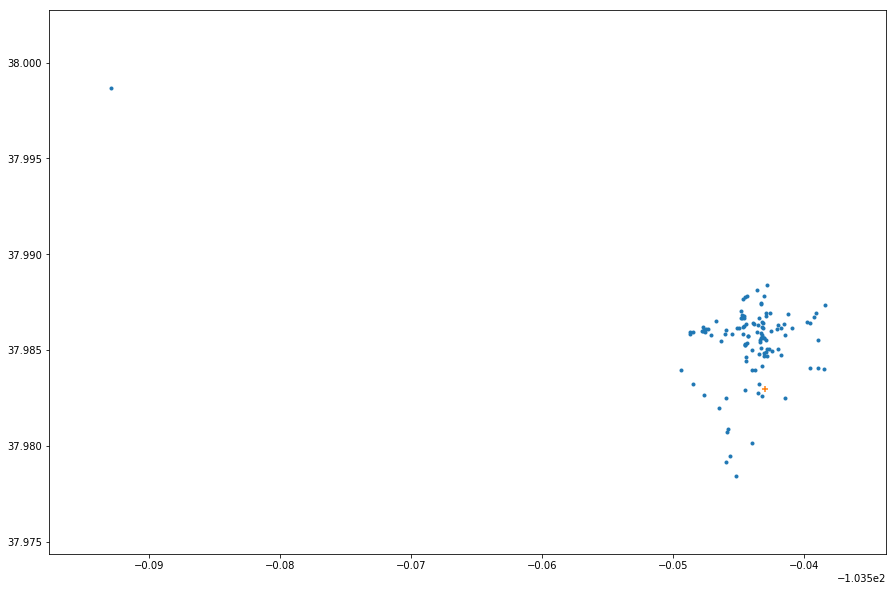

In [15]:
# Note: Be careful in graphing - Latitude is the Y-axis, Longitude is the X-axis. 
# In folium maps, the algorithm adjusts that for you, but in scatter plots you get literal based on 1st or 2nd order.
plt.figure(figsize=(15, 10))
plt.scatter(dataframe_filtered.lng, dataframe_filtered.lat, marker='.')
plt.scatter(longitude, latitude, marker='+')

### Great scatterplot! Exactly what I wanted to see. We can compare this with the cluster map later.

## 2. Explore a Given Venue
> `https://api.foursquare.com/v2/venues/`**VENUE_ID**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**

### A. Let's explore the closest venue -- _Public Library_

In [76]:
venue_id = '4e1cc6e97d8b8fe8c30b4b15' # ID of Pubic Library
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4e1cc6e97d8b8fe8c30b4b15?client_id=QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ&client_secret=1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V&v=20180604'

#### Send GET request for result

In [77]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'pageUpdates', 'inbox', 'attributes'])


{'id': '4e1cc6e97d8b8fe8c30b4b15',
 'name': 'Woodruff Memorial Library',
 'contact': {},
 'location': {'address': '5th & Colorado',
  'lat': 37.983224985532495,
  'lng': -103.54337713622553,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.983224985532495,
    'lng': -103.54337713622553}],
  'postalCode': '81050',
  'cc': 'US',
  'city': 'La Junta',
  'state': 'CO',
  'country': 'United States',
  'formattedAddress': ['5th & Colorado',
   'La Junta, CO 81050',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/woodruff-memorial-library/4e1cc6e97d8b8fe8c30b4b15',
 'categories': [{'id': '4bf58dd8d48988d12f941735',
   'name': 'Library',
   'pluralName': 'Libraries',
   'shortName': 'Library',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/library_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count': 0, 'groups': []},
 'dislike': False,
 'ok': False,
 'beenHere': {'count': 0,
  'unconf

### B. Get the venue's overall rating.

In [78]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


Not all venues are rated in a small town, especially the Public Library.
Let's look at a restaurant. 

In [79]:
venue_id = '5111313ce4b04bd28e7a2c36' # ID of a Coffee Shop
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


Since this restaurant has no ratings, let's check a third venue - Diner.

In [80]:
venue_id = '4c36238c0a71c9b60e9f3cc9' # ID of Diner
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.0


### C. We have learned that few venues in this small town are rated. So we write a loop to find which venues are rated. 

In [95]:
# Note: This block shows all reviews if you run it. For La Junta there were no reviews at all. Hence the conclusion statement that follows below.
# Print a line for each venue that has been rated, and '.None.' is it has no rating.
for venue_id in zip(dataframe_filtered.id):
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print(result['response']['venue']['rating'])
    except:
        print('.None.')

.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.


### Conclusion. There are no ratings on any businesses in this town. That is an interesting lesson about small towns.

## 3. Run Clustering on all of the venues

### A. Identify all the categories.

In [82]:
dataframe_filtered.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
categories,,,,,,,,,,,,,,
ATM,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Antique Shop,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Arcade,1,1,1,1,1,1,1,1,1,1,1,0,1,1
Asian Restaurant,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Automotive Shop,3,1,3,2,3,1,3,3,3,3,3,1,3,3
Bagel Shop,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Bank,4,3,4,4,4,1,4,4,4,4,4,3,4,4
Bar,3,3,3,3,3,2,3,3,3,3,3,3,3,3
Building,4,4,4,4,4,1,4,4,4,4,4,4,4,4


In [83]:
print('There are {} unique categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 62 unique categories.


### Note: In the NYC example they ordered the venues and selected only the top one. For a small town this is not necessary because the number is much smaller. So that step has been omitted. 

### B. Cluster with K-means

### Create a 2D dataframe from with JUST lat and lng in it. Then feed that to kmeans.fit

In [84]:
# 2D data here. Put lng (as x) and lat (as y) into a numpy array. 
df_2d = dataframe_filtered[['lng', 'lat']].values
df_2d

array([[-103.7193376 ,   38.04808194],
       [-103.54326508,   37.98512137],
       [-103.54316318,   37.98565642],
       [-103.54444392,   37.985273  ],
       [-103.54291033,   37.98550776],
       [-103.54354729,   37.98593073],
       [-103.543935  ,   37.984972  ],
       [-103.54250606,   37.98601008],
       [-103.54338732,   37.98477764],
       [-103.5430954 ,   37.98613892],
       [-103.543323  ,   37.985502  ],
       [-103.543191  ,   37.985792  ],
       [-103.5429    ,   37.98487544],
       [-103.544372  ,   37.98636809],
       [-103.54322357,   37.98560383],
       [-103.54305836,   37.9856413 ],
       [-103.542667  ,   37.98503   ],
       [-103.54464313,   37.9858274 ],
       [-103.54301067,   37.98467073],
       [-103.543256  ,   37.985899  ],
       [-103.543813  ,   37.986357  ],
       [-103.54320787,   37.98417974],
       [-103.54447696,   37.98529166],
       [-103.54279157,   37.9850743 ],
       [-103.54243451,   37.98492593],
       [-103.54440024,   

In [85]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from scikitlearn
from sklearn.cluster import KMeans

In [99]:
# set number of clusters - experiment with various numbers before submitting assignment
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_2d)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print(kmeans.labels_.shape)

(100,)


### C. Create a dataframe of these clusters

In [100]:
dataframe_merged = dataframe_filtered
# add clustering labels
dataframe_merged['Cluster Labels'] = kmeans.labels_

dataframe_merged.head() # check the last columns!

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels
0,Jakes Gym,Gym,NaN,US,NaN,United States,NaN,16917,"[Colorado, United States]","[{'label': 'display', 'lat': 38.04808194229527...",38.048082,-103.719338,NaN,Colorado,4eac379fe5fa45480e67f577,1
1,LJ Post Office,Post Office,324 Colorado Ave,US,La Junta,United States,NaN,51,"[324 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98512136666667...",37.985121,-103.543265,81050,CO,4e0e408122711665f6131b28,0
2,Abba Eye Care,Optical Shop,314 Colorado Ave,US,La Junta,United States,NaN,92,"[314 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98565641985366...",37.985656,-103.543163,81050,CO,4e0b546ab61cf2466a0f1ca0,0
3,District Attorney's Office,Government Building,323 Santa Fe Ave Fl 2,US,La Junta,United States,NaN,61,"[323 Santa Fe Ave Fl 2, La Junta, CO 81050, Un...","[{'label': 'display', 'lat': 37.98527300110693...",37.985273,-103.544444,81050,CO,4e5eb1a688771c946894f2f6,0
4,Bamboo Panda,Asian Restaurant,313 Colorado Ave,US,La Junta,United States,NaN,98,"[313 Colorado Ave, La Junta, CO 81050, United ...","[{'label': 'display', 'lat': 37.98550775861079...",37.985508,-103.542910,81050,CO,4cf6aa3ddc40a35d8a3d4954,0


### D. Finally!! Display a map of the clusters.

In [102]:
# This is duplicate of the address code at the beginning. You can just use those values and not recalculate them here. 
#address = city
#geolocator = Nominatim()
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
print('The Latitude Longitude location for {} is {}, {}.'.format(city, latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_merged['lat'], dataframe_merged['lng'], dataframe_merged['categories'], dataframe_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
#        color='blue',
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
#        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The Latitude Longitude location for La Junta, CO is 37.9850091, -103.5438321.


### WooHoo!! It looks great!

### Export the final dataframe to a csv file on my computer for saving. 

In [ ]:
export_csv = dataframe_merged.to_csv (r'C:\Users\Roger\DocumentsLaJunta_venues.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

<a id="item6"></a>

### Thank you for reviewing this code!

This notebook was created by [Roger Smith](https://www.linkedin.com/in/rogersmithcto/). I hope you found this project interesting and educational. Feel free to contact me if you have any questions!

This notebook was created as an assignment in the **Coursera** course called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week2_LAB1).

<hr>
Copyright &copy; 2019 [Roger Smith]. This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).